In [1]:
from feature_selector import FeatureSelector
import pandas as pd
import numpy as np

In [2]:
data_raw = pd.read_csv('events_up_to_01062018.csv',low_memory=False)
data_val = pd.read_csv('labels_training_set.csv',low_memory=False)

In [3]:
features = pd.read_csv('features_0.84927.csv', low_memory = False)

In [4]:
fs = FeatureSelector(data = features, labels = data_val)

In [5]:
fs.identify_missing(missing_threshold = 0.6)

0 features with greater than 0.60 missing values.



In [6]:
fs.identify_collinear(correlation_threshold = 0.98)

21 features with a correlation magnitude greater than 0.98.



/home/carito/.local/lib/python2.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


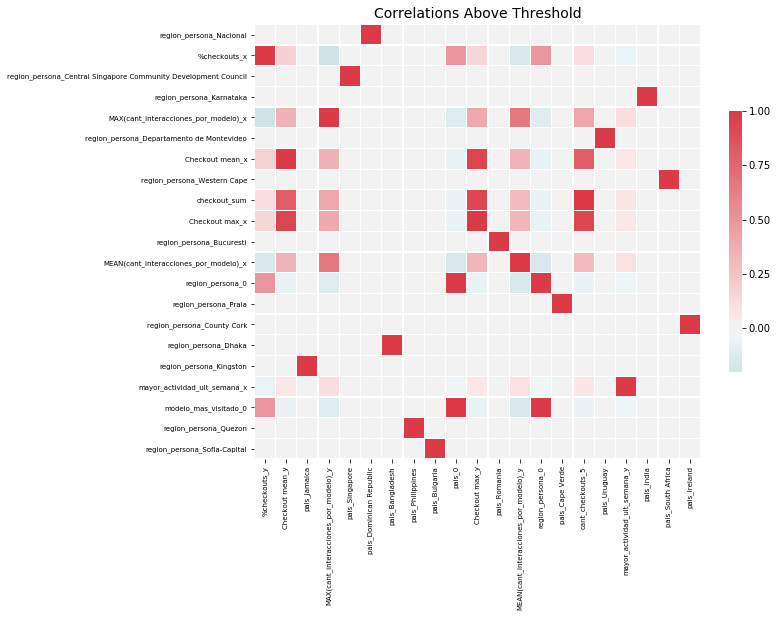

In [7]:
fs.plot_collinear()

In [8]:
collinear_features = fs.ops['collinear']

In [9]:
fs.record_collinear

,corr_feature,corr_value,drop_feature
0,checkout_sum,1.0,cant_checkouts_5
1,%checkouts_x,1.0,%checkouts_y
2,mayor_actividad_ult_semana_x,1.0,mayor_actividad_ult_semana_y
3,MAX(cant_interacciones_por_modelo)_x,1.0,MAX(cant_interacciones_por_modelo)_y
4,MEAN(cant_interacciones_por_modelo)_x,1.0,MEAN(cant_interacciones_por_modelo)_y
5,Checkout max_x,1.0,Checkout max_y
6,Checkout mean_x,1.0,Checkout mean_y
7,modelo_mas_visitado_0,1.0,region_persona_0
8,modelo_mas_visitado_0,1.0,pais_0
9,region_persona_0,1.0,pais_0


Memory error...

In [ ]:
fs.identify_zero_importance(task = 'classification', 
                            eval_metric = 'auc', 
                            n_iterations = 10, 
                             early_stopping = True)

In [ ]:
zero_importance_features = fs.ops['zero_importance']
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [ ]:
fs.identify_low_importance(cumulative_importance = 0.99)

In [ ]:
fs.feature_importances

In [12]:
fs.identify_single_unique()

0 features with a single unique value.



In [10]:
train_removed = fs.remove(methods = ['collinear'])

Removed 21 features.


Si anda el resto:

In [ ]:
train_removed = fs.remove(methods = ['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] )

In [11]:
train_removed.to_csv("train_removed.csv")